# Свойства оценок

## Задача 1

<div style="text-align: justify"> 
(К теоретической задаче 1) Сгенерируйте выборку $X_{1}, \ldots, X_{N}$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^{4}$. Для всех $n \leq N$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2 \overline{X}, \overline{X} + X_{(n)} / 2, (n + 1) X_{(1)}, X_{(1)} + X_{(n)}, \frac{n + 1}{n} X_{(n)}$. Постройте на одном графике разными цветами для всех оценок функции модуля разности оценки и истинного значения $\theta$ в зависимости от $n$. Если некоторые оценки (при фиксированном $n$) сильно отличаются от истинного значения параметра $\theta$, то исключите их и постройте еще один график со всеми кривыми (для измененного значения $\theta$). Для избавления от больших значений разности в начале ограничьте масштаб графика. Для наглядности точки можно соединить линиями. Какая оценка получилась лучше (в смысле упомянутого модуля разности при $n = N$)? Проведите эксперимент для разных значений $\theta$ (количество графиков равно количеству значений $\theta$). 
</div>

In [1]:
#импортируем необходимые модули
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
#функция для подсчета оценок из теоретической задачи
def make_estimators(sample):
    size = sample.shape[0]
    
    #создаем массивы оценок из задачи для всех n <= N
    estimator_1 = np.array([2 * sample[:n].mean() for n in range(1, size + 1)])
    estimator_2 = np.array([sample[:n].mean() + sample[:n].max() / 2 for n in range(1, size + 1)])
    estimator_3 = np.array([(n + 1) * sample[:n].min() for n in range(1, size + 1)])
    estimator_4 = np.array([sample[:n].min() + sample[:n].max() for n in range(1, size + 1)])
    estimator_5 = np.array([(n + 1) / n * sample[:n].max() for n in range(1, size + 1)])
    
    return estimator_1, estimator_2, estimator_3, estimator_4, estimator_5

In [3]:
#функция для построения графиков зависимости модуля разности оценок и истинного значения параметра от n
def print_plot(sample, ylim = 0, flag = 'not all'):
    estimator_1, estimator_2, estimator_3, estimator_4, estimator_5 = make_estimators(sample)
    plt.figure(figsize = (12, 7))
    if (ylim != 0):
        plt.ylim(0, ylim)
    plt.plot(np.abs(estimator_1 - theta), label = '$2 \overline{X}$')
    plt.plot(np.abs(estimator_2 - theta), label = '$\overline{X} + X_{(n)} / 2$')
    if (flag == 'all'):
        plt.plot(np.abs(estimator_3 - theta), label = '$(n + 1)X_{(1)}$')
    plt.plot(np.abs(estimator_4 - theta), label = '$X_{(1)} + X_{(n)}$')
    plt.plot(np.abs(estimator_5 - theta), label = r'$\frac{n + 1}{n}X_{(n)}$')
    plt.title('Dependency of absolute value of difference between estimated and true value of parameter from sample size', fontsize = 14)
    plt.xlabel('Sample size', fontsize = 12)
    plt.ylabel(r'$|\theta_{est} - \theta_{true}|$', fontsize = 12)
    plt.legend(loc = 'best', prop = {'size': 12})
    plt.grid()
    plt.show()

Построим графики функции модуля разности оценки и истинного значения $\theta$ в зависимости от $n$.

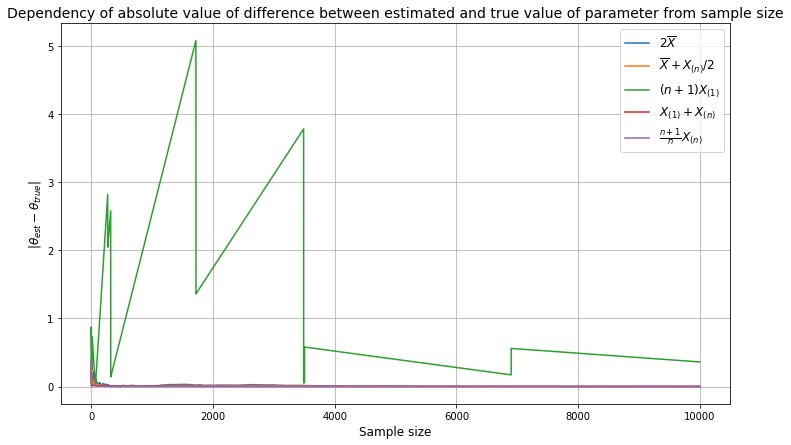

In [4]:
theta = 1
N = 10000

#генерация выборки из равномерного распределения на отрезке [0, theta] размера N
sample = sts.uniform.rvs(loc = 0, scale = theta, size = N)

#строим график
print_plot(sample, 0, 'all')

Заметим, что оценка $(n + 1)X_{(1)}$ сильно отличается от истинного значения параметра $\theta$. Исключим ее и построим графики для другого параметра $\theta$, но уже без данной оценки.

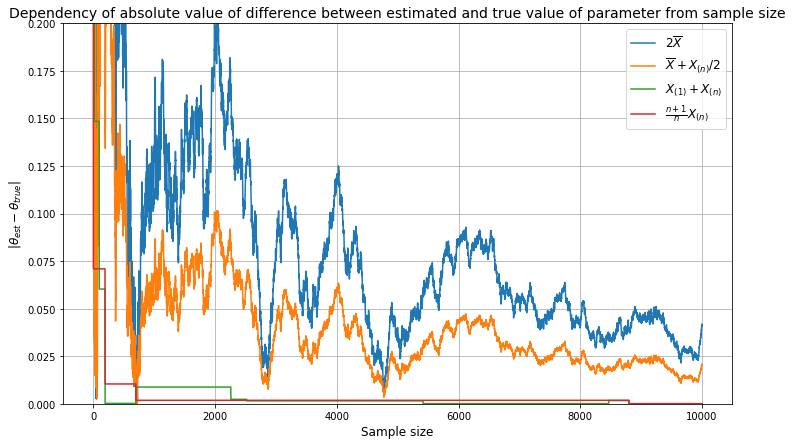

In [5]:
theta = 10

#генерация выборки из равномерного распределения на отрезке [0, theta] размера N
sample = sts.uniform.rvs(loc = 0, scale = theta, size = N)

#строим график
print_plot(sample, 0.2)

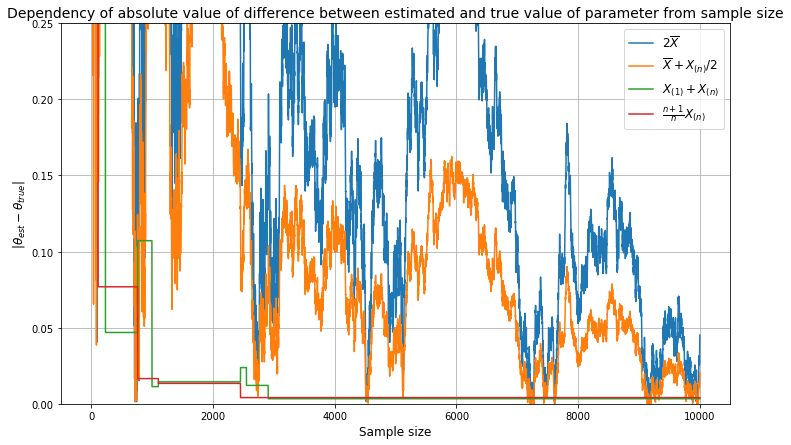

In [6]:
theta = 50

#генерация выборки из равномерного распределения на отрезке [0, theta] размера N
sample = sts.uniform.rvs(loc = 0, scale = theta, size = N)

#строим график
print_plot(sample, 0.25)

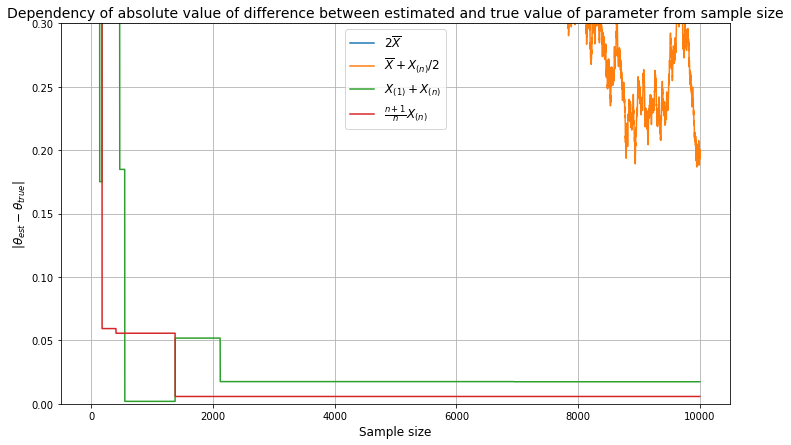

In [7]:
theta = 100

#генерация выборки из равномерного распределения на отрезке [0, theta] размера N
sample = sts.uniform.rvs(loc = 0, scale = theta, size = N)

#строим график
print_plot(sample, 0.3)

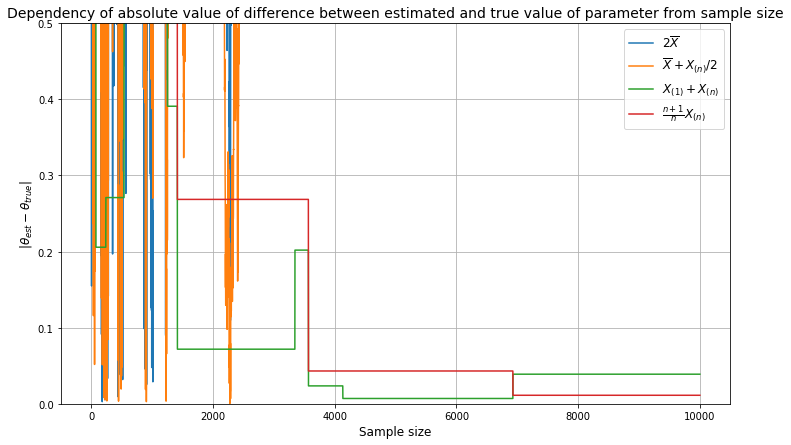

In [8]:
theta = 300

#генерация выборки из равномерного распределения на отрезке [0, theta] размера N
sample = sts.uniform.rvs(loc = 0, scale = theta, size = N)

#строим график
print_plot(sample, 0.5)

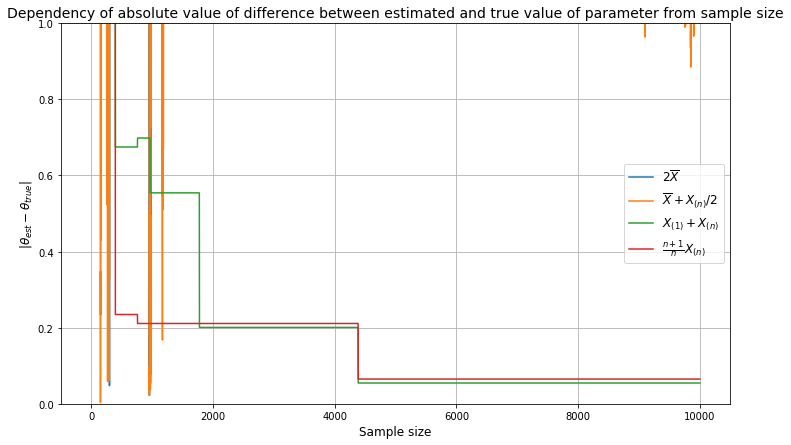

In [9]:
theta = 1000

#генерация выборки из равномерного распределения на отрезке [0, theta] размера N
sample = sts.uniform.rvs(loc = 0, scale = theta, size = N)

#строим графики в стандартном масштабе и в ограниченном по оси y
print_plot(sample, 1)

### Выводы

Лучшими оценками можно считать оценки $X_{(1)} + X_{(n)}, \frac{n + 1}{n} X_{(n)}$ (исходя из построенных графиков). При этом при увеличении параметра $\theta$ абсолютное значение разности между даже этими оценками близко к нулю, но не всегда ему равно. Также оценка $(n + 1)X_{(1)}$ сильно отличается от истинного значения параметра $\theta$.

## Задача 2

<div style="text-align: justify">
(К теоретической задаче 5) Сгенерируйте выборку $X_{1}, \ldots, X_{N}$ из экспоненциального распределения с параметром $\theta = 1$ для $N = 10^{4}$. Для всех $n \leq N$ посчитайте оценку $(k! / \overline{X^{k}})^{1 / k}$ параметра $\theta$. Проведите исследование, аналогичное предыдущей задаче, и выясните, при каком $k$ оценка ведет себя лучше (рассмотрите не менее 10 различных значений $k$).
</div>

In [10]:
#функция для подсчета необходимой оценки
def est_func(k, sample):
    return math.pow(math.factorial(k) / (sample ** k).mean(), 1. / float(k))

In [11]:
#функция для создания массива оценок для всех n <= N
def make_estimator(sample, k):
    size = sample.shape[0]
    estimator = np.array([est_func(k, sample[:n]) for n in range(1, size + 1)])
    return estimator

In [12]:
#функция для построения графика зависимости модуля разности посчитанной оценки и истинного значения параметра theta
def print_plot(estimator, ylim):
    plt.figure(figsize = (12, 7))
    plt.ylim(0, ylim)
    plt.plot(np.abs(estimator - theta), label = r'$(k! / \overline{X^{k}})^{1 / k}$')
    plt.title('Dependency of absolute value of difference between estimated and true value of parameter from sample size', fontsize = 14)
    plt.xlabel('Sample size', fontsize = 12)
    plt.ylabel(r'$|\theta_{est} - \theta_{true}|$', fontsize = 12)
    plt.legend(loc = 'best', prop = {'size': 12})
    plt.grid()
    plt.show()

In [13]:
theta = 1
N = 10000

#генерация выборки из экспоненциального распределения с параметром theta = 1 размера N
sample = sts.expon.rvs(scale = 1. / theta, size = N)

Построим графики зависимости модуля разности посчитанной оценки и истинного значения параметра $\theta$ для различных значений параметра $k$.

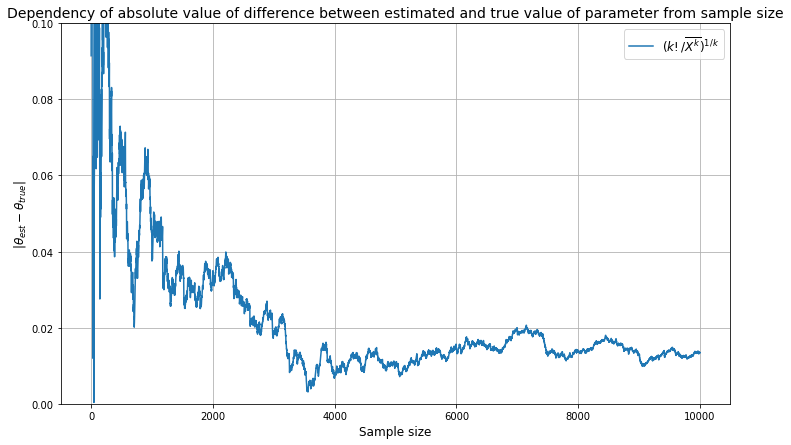

In [14]:
estimator = make_estimator(sample, 1)
print_plot(estimator, 0.1)

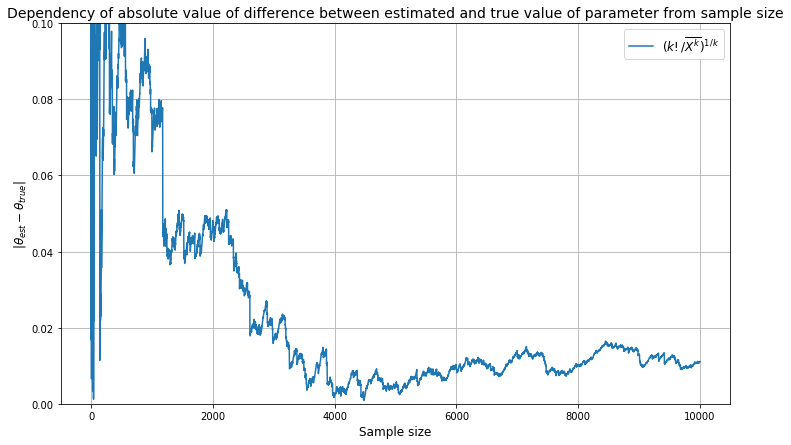

In [15]:
estimator = make_estimator(sample, 2)
print_plot(estimator, 0.1)

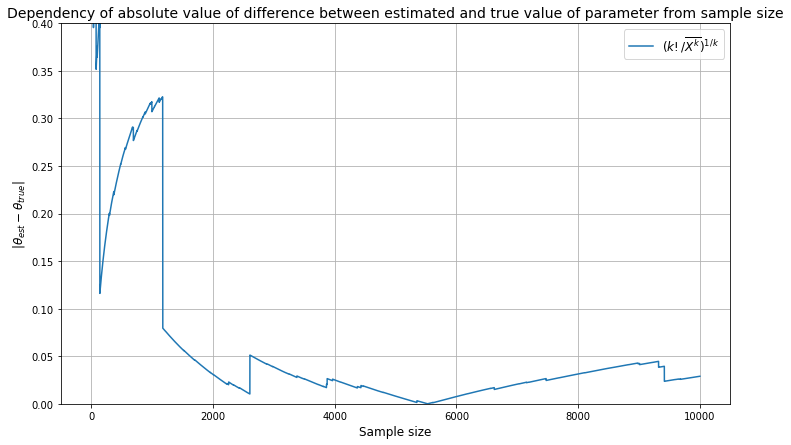

In [16]:
estimator = make_estimator(sample, 10)
print_plot(estimator, 0.4)

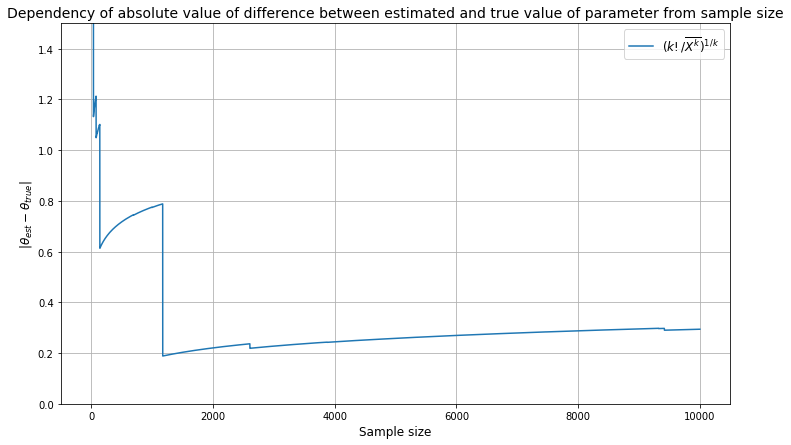

In [17]:
estimator = make_estimator(sample, 20)
print_plot(estimator, 1.5)

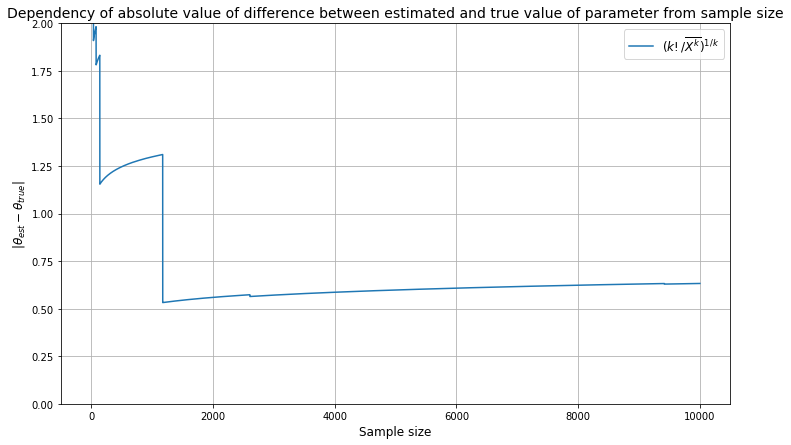

In [18]:
estimator = make_estimator(sample, 30)
print_plot(estimator, 2)

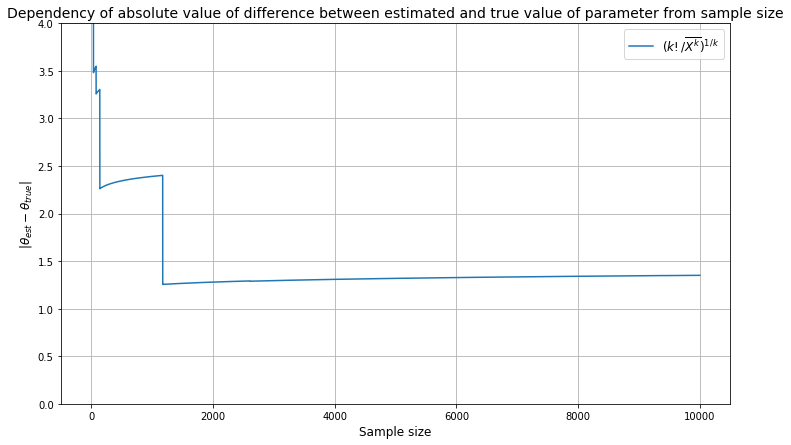

In [19]:
estimator = make_estimator(sample, 50)
print_plot(estimator, 4)

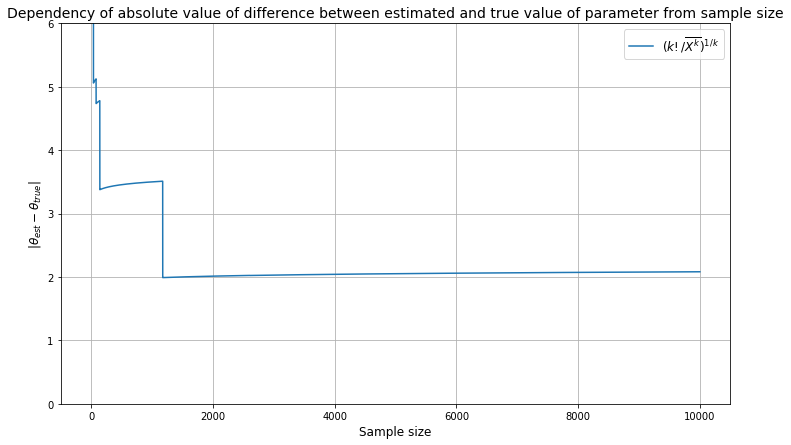

In [20]:
estimator = make_estimator(sample, 70)
print_plot(estimator, 6)

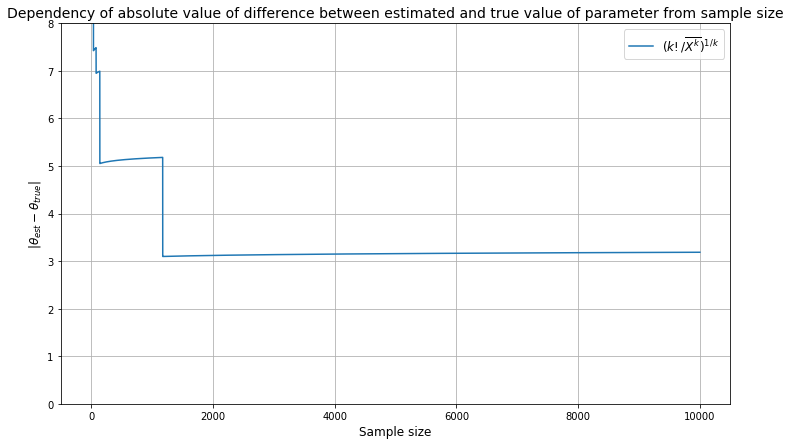

In [21]:
estimator = make_estimator(sample, 100)
print_plot(estimator, 8)

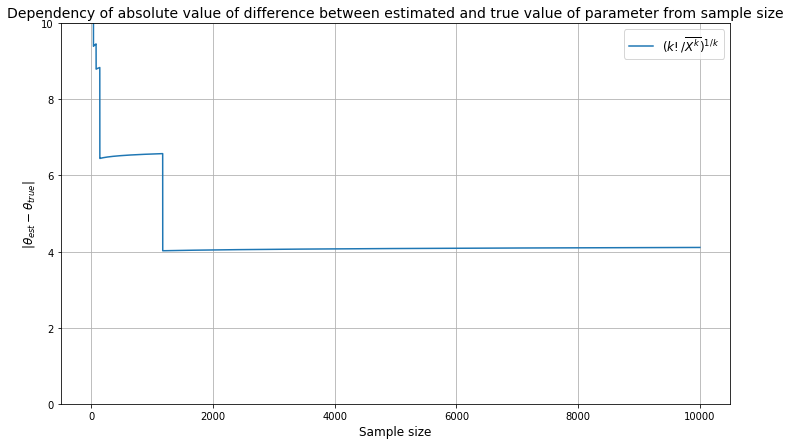

In [22]:
estimator = make_estimator(sample, 125)
print_plot(estimator, 10)

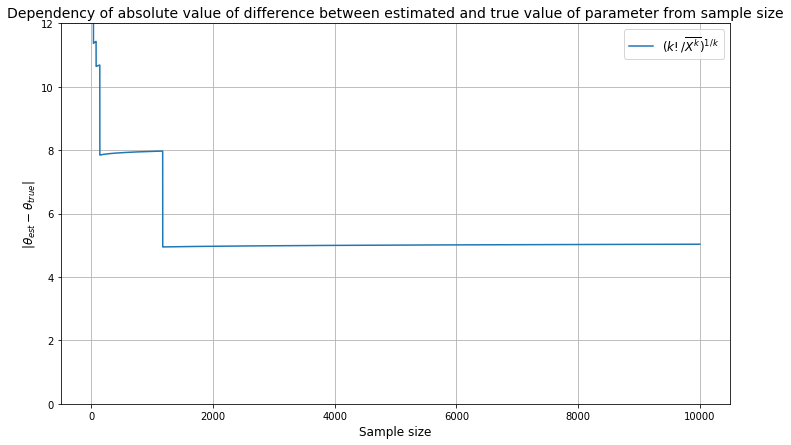

In [23]:
estimator = make_estimator(sample, 150)
print_plot(estimator, 12)

### Выводы

Можно сделать вывод, исходя из построенных графиков, что оценка ведет себя лучше при малых значениях параметра $k$, так как при увеличении этого параметра при стремлении $n$ к $N$ модуль разности между рассчитанной оценкой параметра $\theta$ и истинным значением $\theta$ увеличивается.

## Задача 3

<div style="text-align: justify">
Придумайте распределение, у которого конечны первые четыре момента, а пятый - нет. Сгенерируйте выборку $X_{1}, \ldots, X_{N}$ из этого распределения для $N = 10^{4}$. Постройте график плотности, а также нанесите точки выборки на график (с нулевой $y$-координатой). Для всех $n \leq N$ посчитайте оценку $s^{2} = s^{2}(X_{1}, \ldots, X_{N})$ для дисперсии. Постройте график зависимости модуля разности оценки дисперсии и ее истинного значения от $n$. Проведите аналогичное исследование для выборки из распределения Коши, где вместо графика модуля разности оценки дисперсии и ее истинного значения (которого не существует) постройте график оценки дисперсии.
</div>

Используем в качестве примера распределение Парето с параметром $\alpha = 5$. Плотность распределения Парето равна
$$ p(x) = \frac{\alpha x_{0}^{\alpha}}{x^{\alpha + 1}}. $$ 
Для такого распределения существуют только моменты порядка $t < \alpha$.

In [24]:
#распределение Парето с параметром 5
alpha = 5
N = 10000
right_limit = 5

#генерация выборки из распределения Парето с параметром alpha = 5 размера N
sample_pareto = sts.pareto.rvs(b = alpha, size = N)

#получение плотности распределения Парето
x_pareto = np.linspace(1, right_limit)
pareto_pdf = sts.pareto.pdf(x_pareto, alpha)

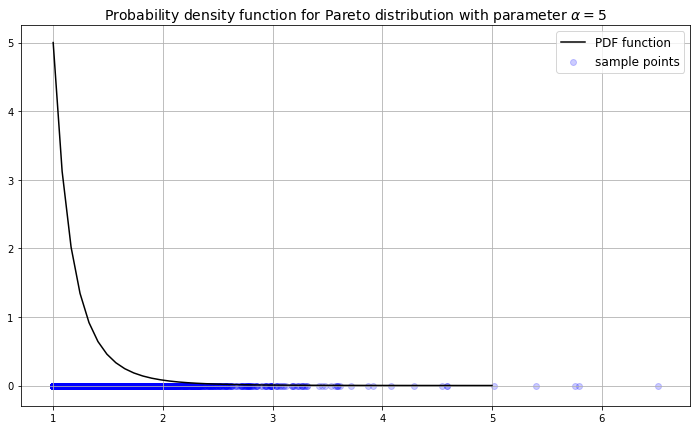

In [25]:
#построение графика плотности распределения Парето и точек выборки
plt.figure(figsize = (12, 7))
plt.plot(x_pareto, pareto_pdf, color = 'k', label = 'PDF function')
plt.scatter(sample_pareto, np.zeros(N), color = 'b', alpha = 0.2, label = 'sample points')
plt.title(r'Probability density function for Pareto distribution with parameter $\alpha = 5$', fontsize = 14)
plt.legend(loc = 'best', prop = {'size': 12})
plt.grid()
plt.show()

In [26]:
#создание массива для оценки дисперсии для распределения Парето
#pareto_var = np.array([sample_pareto[:n].var() for n in range(1, N + 1)])
pareto_var_est = np.array([(sample_pareto[:n] ** 2).mean() - (sample_pareto[:n].mean()) ** 2 for n in range(1, N + 1)])

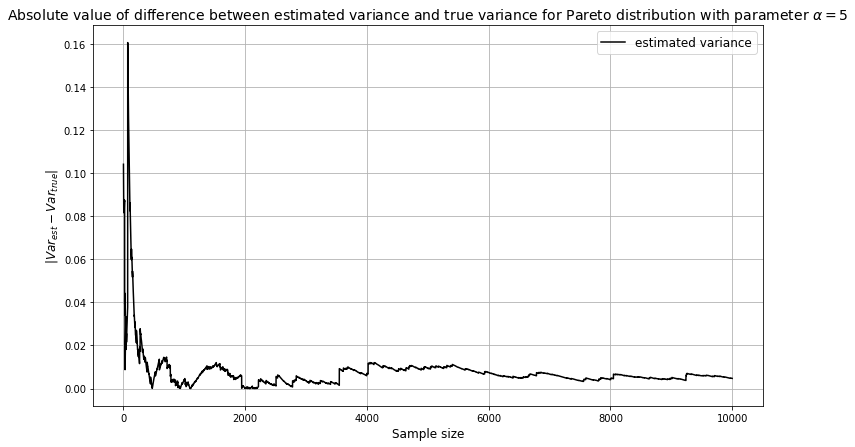

In [27]:
#построение графика зависимости модуля разности посчитанной оценки дисперсии и ее истинного значения для всех n <= N
plt.figure(figsize = (12, 7))
plt.plot(np.abs(pareto_var_est - sts.pareto.var(b = alpha)), color = 'k', label = 'estimated variance')
plt.title(r'''Absolute value of difference between estimated variance and true variance for Pareto distribution with parameter $\alpha = 5$''', fontsize = 14)
plt.xlabel('Sample size', fontsize = 12)
plt.ylabel(r'$|Var_{est} - Var_{true}|$', fontsize = 12)
plt.legend(loc = 'best', prop = {'size': 12})
plt.grid()
plt.show()

In [28]:
#генерация выборки из стандартного распределения Коши размера N
sample_cauchy = sts.cauchy.rvs(size = N)

border = 1000

#получение плотности распределения Коши
x_cauchy = np.linspace(-border, border)
pdf_cauchy = sts.cauchy.pdf(x_cauchy)

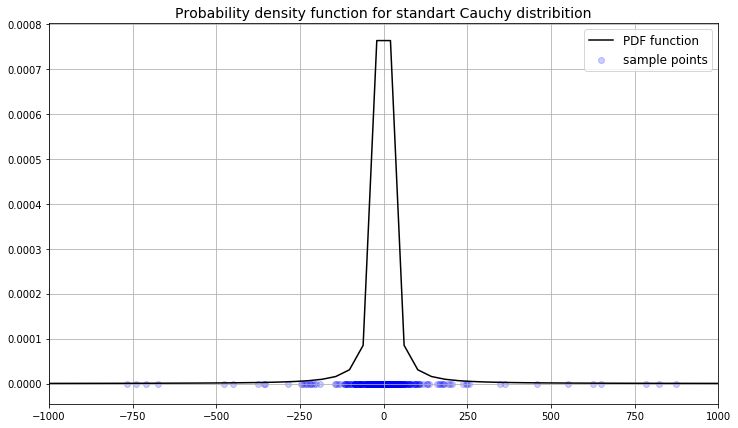

In [29]:
#построение графика плотности распределения Коши и точек выборки
plt.figure(figsize = (12, 7))
plt.plot(x_cauchy, pdf_cauchy, color = 'k', label = 'PDF function')
plt.scatter(sample_cauchy, np.zeros(N), color = 'b', alpha = 0.2, label = 'sample points')
plt.xlim((-border, border))
plt.title(r'Probability density function for standart Cauchy distribition', fontsize = 14)
plt.legend(loc = 'best', prop = {'size': 12})
plt.grid()
plt.show()

In [30]:
#создание массива для оценки дисперсии для распределения Коши
#cauchy_var_est = np.array([sample_cauchy[:n].var() for n in range(1, N + 1)])
cauchy_var_est = np.array([(sample_cauchy[:n] ** 2).mean() - (sample_cauchy[:n].mean()) ** 2 for n in range(1, N + 1)])

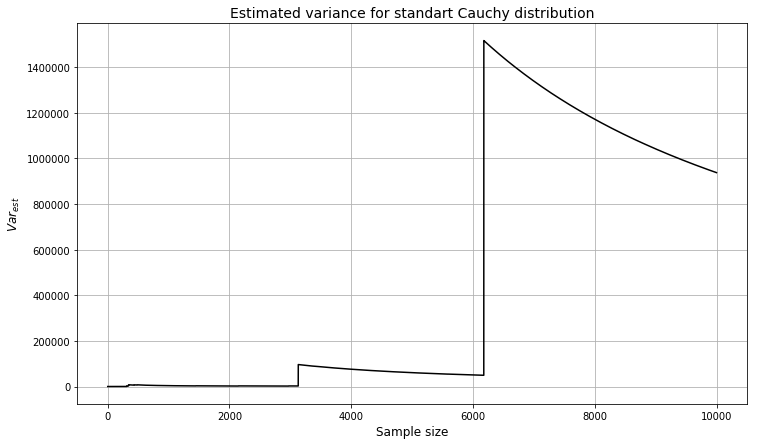

In [31]:
#построение графика для оценки дисперсии для стандартной распределения Коши
plt.figure(figsize = (12, 7))
plt.plot(cauchy_var_est, color = 'k')
plt.title('Estimated variance for standart Cauchy distribution', fontsize = 14)
plt.xlabel('Sample size', fontsize = 12)
plt.ylabel(r'$Var_{est}$', fontsize = 12)
plt.grid()
plt.show()

### Выводы

<div style="text-align: justify">
По графику зависимости модуля разности оценки дисперсии и ее истинного значения от $n$ можно заметить, что при стремлении $n$ к $N$ значение оценки дисперсии близко к ее истинному значению. По графику оценки дисперсии распределения Коши можно утверждать, что значение дисперсии не сходится к какому-либо значению.
</div>

## Задача 4

<div style="text-align: justify">
Сгенерируйте выборку $X_{1}, \ldots, X_{N}$ из стандартного нормального распределения для $N = 10^{4}$. Для всех $n \leq N$ посчитайте по ней эмпирическую функцию распределения. Для некоторых $n$ (например, $n \in \{ 10, 25, 50, 100, 1000, N \})$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности $0.2$), нанеся на каждый из них истинную функцию распределения (количество графиков равно количеству различных значений $n$). Для всех $n \leq N$ посчитайте точное значение $D_{n} = \sup_{x \in \mathbb{R}}{|\hat{F}_{n}(x) - F(x)|}$ и постройте график зависимости статистик $D_{n}$ и $\sqrt{n} D_{n}$ от n.
</div>

In [32]:
#функция для подсчета эмпирической функции распределения
def ecdf(sample, border, num_points):
    size = sample.shape[0]
    x_sample = np.linspace(-border, border, num_points)
    emp_cdf = np.array([])
    for i in range(num_points):
        emp_cdf = np.append(emp_cdf, np.sum([x <= x_sample[i] for x in sample]) / float(size))
        
    return x_sample, emp_cdf

Построим графики эмпирической функции распределения (отметив на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности  0.2 ), нанеся на каждый из них истинную функцию распределения.

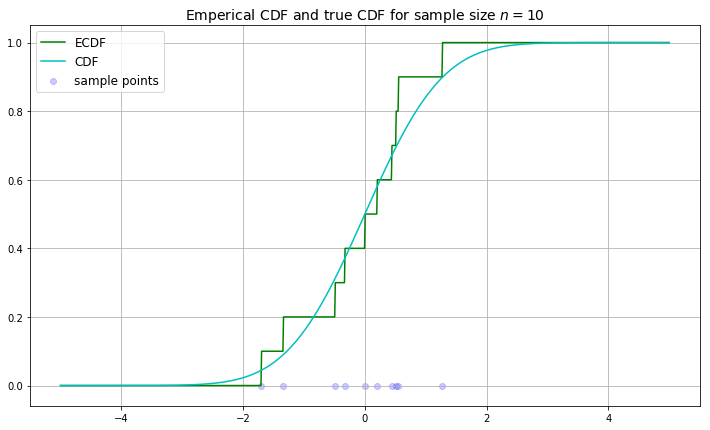

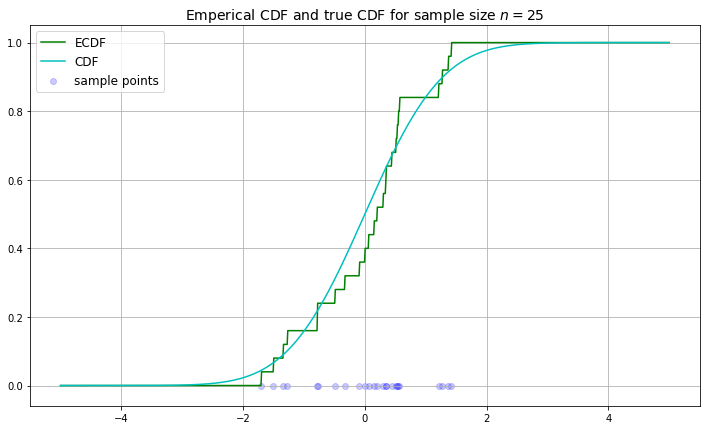

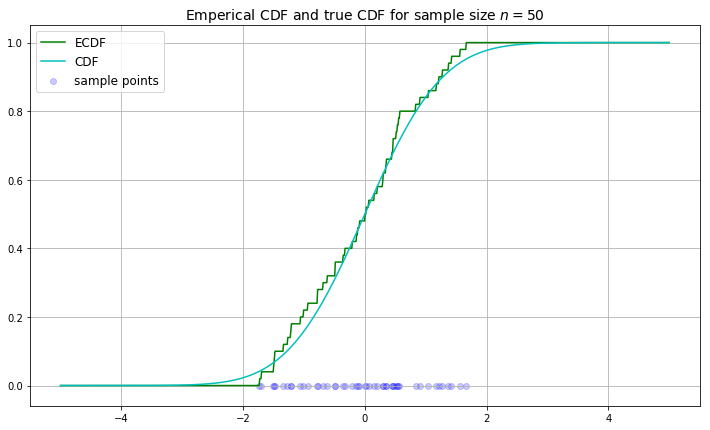

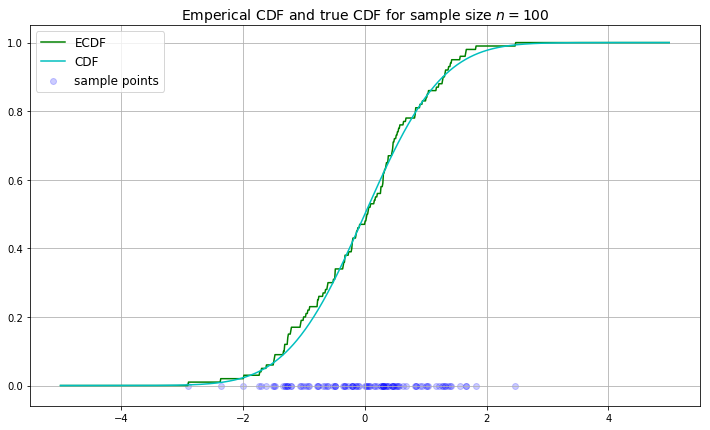

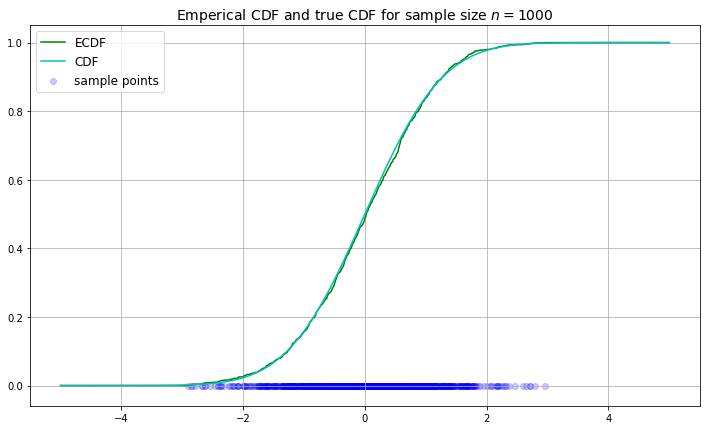

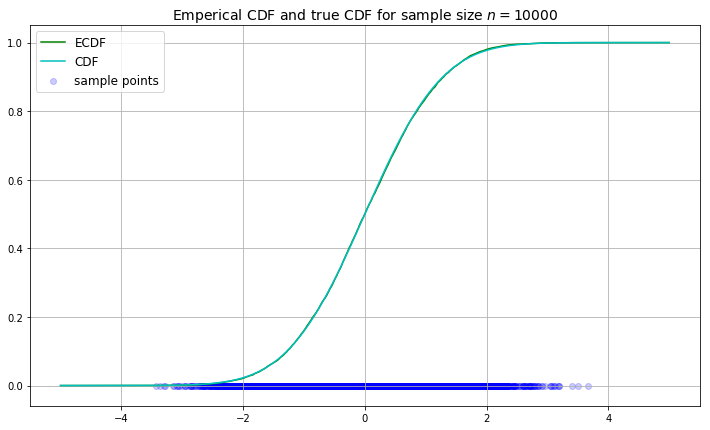

In [33]:
N = 10000
n_array = np.array([10, 25, 50, 100, 1000, N])
border = 5
num_points = 1000

#генерация выборки из стандартного нормального распределения размера N
sample = sts.norm.rvs(size = N)

for elem in n_array:
    #получение эмпирической функции распределения
    x, emp_cdf = ecdf(sample[:elem], border, num_points)
    
    #построение эмпирической функции распределения
    plt.figure(figsize = (12, 7))
    plt.plot(x, emp_cdf, color = 'g', label = 'ECDF')
    
    #построение точек подвыборки
    plt.scatter(sample[:elem], np.zeros(elem), color = 'b', alpha = 0.2, label = 'sample points')
    
    #построение истинной функции распределения
    plt.plot(x, sts.norm.cdf(x), color = 'c', label = 'CDF')
    
    plt.title(r'Emperical CDF and true CDF for sample size $n = {}$'.format(elem), fontsize = 14)
    plt.legend(loc = 'best', prop = {'size': 12})
    plt.grid()
    plt.show()

Для всех $n \leq N$ посчитаем точное значение $D_{n} = \sup_{x \in \mathbb{R}}{|\hat{F}_{n}(x) - F(x)|}$ и построим график зависимости статистик $D_{n}$ и $\sqrt{n} D_{n}$ от n.

In [34]:
%%time
D_n = np.array([])
n_D_n = np.array([])

#возьмем N = 2000, так как расчет для N = 10000 происходит очень долго
N = 2000

#расчет точного значения D_n
for n in range(1, N + 1):
    x, emp_cdf = ecdf(sample[:n], border, num_points)
    sup = np.array([np.abs(f_n - sts.norm.cdf(x_s)) for (f_n, x_s) in zip(emp_cdf, x)]).max()
    D_n = np.append(D_n, sup)
    n_D_n = np.append(n_D_n, np.sqrt(n) * sup)

CPU times: user 9min 27s, sys: 99.7 ms, total: 9min 27s
Wall time: 9min 27s


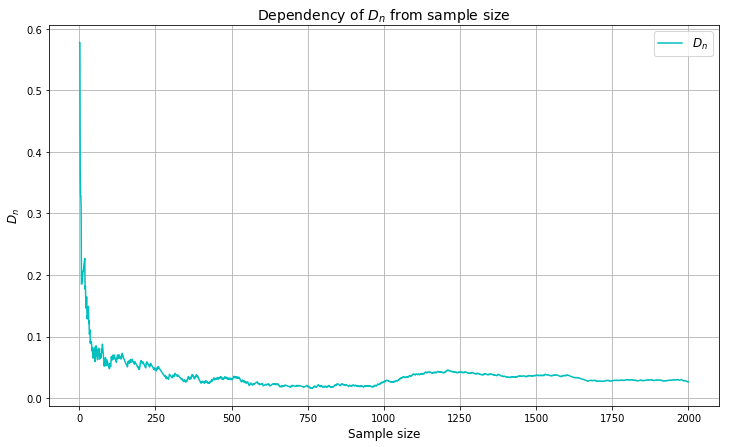

In [35]:
#построение графика зависимости статистики D_n от n
plt.figure(figsize = (12, 7))
plt.plot(np.arange(1, N + 1), D_n, color = 'c', label = r'$D_{n}}$')
plt.title(r'Dependency of $D_{n}$ from sample size', fontsize = 14)
plt.xlabel('Sample size', fontsize = 12)
plt.ylabel(r'$D_{n}$', fontsize = 12)
plt.legend(loc = 'best', prop = {'size': 12})
plt.grid()
plt.show()

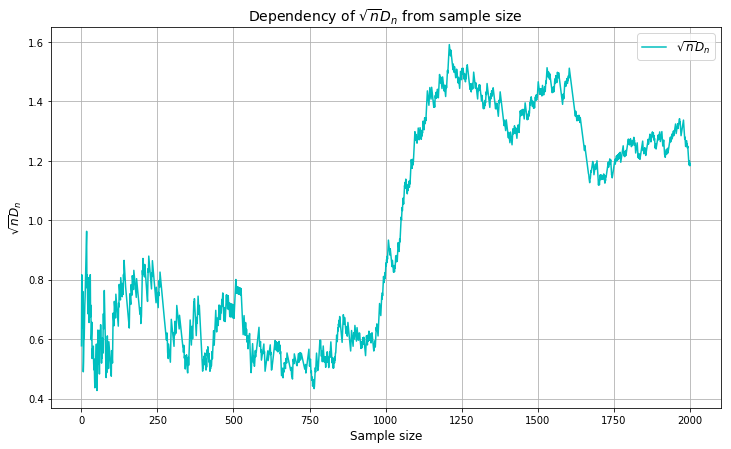

In [36]:
#построение графика зависимости статистики n_D_n от n
plt.figure(figsize = (12, 7))
plt.plot(np.arange(1, N + 1), n_D_n, color = 'c', label = r'$\sqrt{n}D_{n}}$')
plt.title(r'Dependency of $\sqrt{n}D_{n}$ from sample size', fontsize = 14)
plt.xlabel('Sample size', fontsize = 12)
plt.ylabel(r'$\sqrt{n}D_{n}$', fontsize = 12)
plt.legend(loc = 'best', prop = {'size': 12})
plt.grid()
plt.show()

### Выводы

<div style="text-align: justify">
По графикам эмпирической функции распределения и истинной функции распределения можно сделать вывод, что при увеличении размера выборки $n$ выполняется $\hat{F}_{n}(x) \longrightarrow F(x)$ (теорема Гливенко). Также по графику зависимости статистики $D_{n} = \sup_{x \in \mathbb{R}}{|\hat{F}_{n}(x) - F(x)|}$ от $n$ можно заметить, что $D_{n} \longrightarrow 0$ (теорема Гливенко-Кантелли). Для статистики $\sqrt{n}D_{n}$ аналогичного вывода сделать нельзя.
</div>